<a href="https://colab.research.google.com/github/jul1andav1d/Practice-and-Exercises/blob/main/PRACTICE_Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Tree Exercise (Practice)
For this task, you will USE the Boston Housing Data set that you  used in a previous exercise with linear regression.


In [34]:
import pandas as pd

In [35]:
path = '/content/drive/MyDrive/Colab Notebooks/DataSci Week 6 Regression Models/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(path)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [36]:
df.dtypes

CRIM       float64
NOX        float64
RM         float64
AGE        float64
PTRATIO    float64
LSTAT      float64
PRICE      float64
dtype: object

1) Run a regression tree model with default parameters (unlimited depth)

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor

In [38]:
X = df.drop(columns= ['PRICE', 'CRIM','NOX', 'AGE'])
y = df['PRICE']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
dec_tree = DecisionTreeRegressor(random_state=42)

In [41]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [42]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [43]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)

In [44]:
train_score

1.0

In [45]:
test_score

0.4526070862755007

In [46]:
dec_tree

DecisionTreeRegressor(random_state=42)

2) Determine the depth of the default tree.

In [47]:
dec_tree.get_depth()

20

In [48]:
dec_tree.get_n_leaves()

368

3) Try different values for max_depth and determine the optimal value based on the best (highest) r2 value. What is the optimal max_depth based on your trials?

In [49]:
dec_tree_1 = DecisionTreeRegressor(max_depth= 3, random_state=42)
dec_tree_1.fit(X_train, y_train)
train_1_score = dec_tree_1.score(X_train, y_train)
test_1_score = dec_tree_1.score(X_test, y_test)
print(train_1_score)
print(test_1_score)

0.8076973145850337
0.6410142167887275


In [51]:
dec_tree_2 = DecisionTreeRegressor(max_depth= 5, random_state=42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.8913182713079241
0.6922687978091351


In [55]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36))
#will try every value between 2 and 36

#List to store the score for each value of max_depth:
r2= []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth= depth,
                                   random_state=42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

Text(0, 0.5, 'R2')

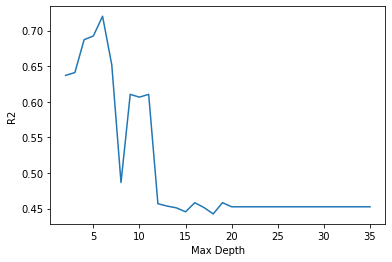

In [58]:
import matplotlib.pyplot as plt

plt.plot(max_depth_range, r2)
plt.xlabel('Max Depth')
plt.ylabel('R2')

#I wanted to create a visualization taken from Lesson on Regression Trees in Python 
#to have a better understanding 
#On what would be the best 'max_depth' for my decission tree.

In [ ]:
#As we can see, the best max_depth would be around 5 or 6.

4) What is the r2 of your final model on the training set and on the test set?

In [59]:
#Decision Tree with max_depth 6:

dec_tree_3 = DecisionTreeRegressor(max_depth= 6, random_state=42)
dec_tree_3.fit(X_train, y_train)
train_3_score = dec_tree_3.score(X_train, y_train)
test_3_score = dec_tree_3.score(X_test, y_test)
print(train_3_score)
print(test_3_score)

0.9214827076541541
0.7200322619567403
